<img src='https://hammondm.github.io/hltlogo1.png' style="float:right">

Linguistics 578<br>
Fall 2023<br>
Hammond

## Things to remember about any homework assignment:

1. For this assignment, you will edit this jupyter notebook and turn it in. Do not turn in pdf files or separate `.py` files.
1. Late work is not accepted.
1. Given the way I grade, you should try to answer *every* question, even if you don't like your answer or have to guess.
1. You may *not* use `python` modules that we have not already used in class.
1. You may certainly talk to your classmates about the assignment, but everybody must turn in *their own* work. It is not acceptable to turn in work that is essentially the same as the work of classmates.
1. All code must run. It doesn't have to be perfect, it may not do all that you want it to do, but it must run without error.
1. Code must run in reasonable time. Assume that if it takes more than *5 minutes* to run (on your machine), that's too long.
1. Please do not add, remove, or copy autograded cells.
1. Make sure to select `restart, run all cells` from the `kernel` menu when you're done and before you turn this in!

***

***my name***: Ashwin Raj

***people I talked to about the assignment***: [put your answer here]

***

## Homework #7

The focus of this assignment is *Kaldi*. You'll run the `yesno` experiment and different versions of `very` and report on those results.


Here are the imports. Please do not import anything else.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

1. Switch into `egs/yesno/s5` and run the `run.sh` script. Running the script itself displays the final WER. What is that value?

In [2]:
# yesnoWER = ?
# YOUR CODE HERE
yesnoWER = 0.00

In [3]:
#this test is hidden!

2. How many files are there in `yesno/s5/exp/mono0a`?

In [4]:
# yesnomono0afiles = ?
# YOUR CODE HERE


yesnomono0afiles = 278 #the command I used was find . -type f | wc -l

In [5]:
#this test is hidden!

3. In the same directory, execute the following command to find out about the final version of the WFST for the single segment model.

```bash
/opt/kaldi/src/gmmbin/gmm-info final.mdl
```

How many "phones" does that report?

In [6]:
# yesnomonophones = ?
# YOUR CODE HERE
yesnomonophones = 3

In [7]:
#this test is hidden!

4. The next command shows the states and transitions in the final model.

```bash
../../../src/bin/show-transitions \
  data/lang/phones.txt \
  exp/mono0a/final.mdl
```

How many states does this show ("transition-state")?

In [8]:
# yesnostates = ?
# YOUR CODE HERE


yesnostates = 11 #Running the commands given in 4. gives me an error 
                #../../../src/bin/show-transitions: No such file or directory
                #So I used transition-state from the command in 3.

In [9]:
#this test is hidden!

5. Now run the `very` experiment eight times with the following settings for `trainnum`: 100, 300, 500, 700, 900, 1100, 1300, 1500. For each run, collect the best WER error rate for segments in isolation (`mono`) and context-dependent segments (`tri1`). Collect the error rate for these with these commands:

```bash
grep WER exp/mono/decode/wer*

grep WER exp/tri1/decode/wer*
```

enter these values into these `numpy` arrays:

In [10]:
# verymono = np.array([...])
# verytri  = np.array([...])
# YOUR CODE HERE
verymono = np.array([11.30, 10.40, 7.40, 8.30, 6.10, 6.90, 5.30, 4.30])
verytri = np.array([13.80, 8.10, 6.60, 5.10, 4.80, 5.20, 4.00, 3.00])


In [11]:
assert(len(verymono) == 8 and len(verytri) == 8)

In [12]:
assert np.isclose(sum(verymono) + sum(verytri),101,atol=10)

In [13]:
assert sum(verymono - verytri) > 2

You should see that the values generally decrease, though there is a fair amount of bouncing around. You should also see that the context-dependent values only get better than the single-segment values as the number of training items increases.

You can plot the values below:

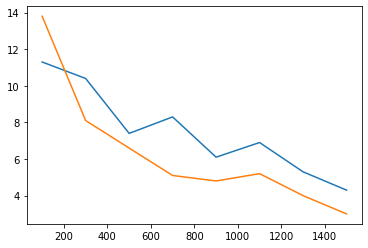

In [14]:
plt.plot([100,300,500,700,900,1100,1300,1500],verymono)
plt.plot([100,300,500,700,900,1100,1300,1500],verytri)
plt.show()